In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
ds = pd.read_csv("weather.csv", usecols = ['MinTemp','MaxTemp','Rainfall','Sunshine'])
ds

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
...,...,...,...,...
361,9.0,30.7,0.0,12.1
362,7.1,28.4,0.0,12.7
363,12.5,19.9,0.0,5.3
364,12.5,26.9,0.0,7.1


In [3]:
ds.describe()

,MinTemp,MaxTemp,Rainfall,Sunshine
count,366.000000,366.000000,366.000000,363.000000
mean,7.265574,20.550273,1.428415,7.909366
std,6.025800,6.690516,4.225800,3.481517
min,-5.300000,7.600000,0.000000,0.000000
25%,2.300000,15.025000,0.000000,5.950000
50%,7.450000,19.650000,0.000000,8.600000
75%,12.500000,25.500000,0.200000,10.500000
max,20.900000,35.800000,39.800000,13.600000


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MinTemp   366 non-null    float64
 1   MaxTemp   366 non-null    float64
 2   Rainfall  366 non-null    float64
 3   Sunshine  363 non-null    float64
dtypes: float64(4)
memory usage: 11.6 KB


In [5]:
ds.isnull().sum()

MinTemp     0
MaxTemp     0
Rainfall    0
Sunshine    3
dtype: int64

In [6]:
ds.replace('0', np.nan)
ds

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
...,...,...,...,...
361,9.0,30.7,0.0,12.1
362,7.1,28.4,0.0,12.7
363,12.5,19.9,0.0,5.3
364,12.5,26.9,0.0,7.1


In [7]:
ds.isnull().sum()

MinTemp     0
MaxTemp     0
Rainfall    0
Sunshine    3
dtype: int64

In [8]:
new_ds = ds.replace({
    'MinTemp' : 0.0,
    'MaxTemp' : 0.0,
    'Sunshine' : 0.0
},np.NaN)


In [9]:
ds

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
...,...,...,...,...
361,9.0,30.7,0.0,12.1
362,7.1,28.4,0.0,12.7
363,12.5,19.9,0.0,5.3
364,12.5,26.9,0.0,7.1


In [10]:
new_ds

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
...,...,...,...,...
361,9.0,30.7,0.0,12.1
362,7.1,28.4,0.0,12.7
363,12.5,19.9,0.0,5.3
364,12.5,26.9,0.0,7.1


In [11]:
new_ds.isnull().sum()

MinTemp      1
MaxTemp      0
Rainfall     0
Sunshine    13
dtype: int64

In [12]:
new_ds.head(30)

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
5,6.2,16.9,0.0,8.2
6,6.1,18.2,0.2,8.4
7,8.3,17.0,0.0,4.6
8,8.8,19.5,0.0,4.1
9,8.4,22.8,16.2,7.7


In [13]:
ds.head(30)

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
5,6.2,16.9,0.0,8.2
6,6.1,18.2,0.2,8.4
7,8.3,17.0,0.0,4.6
8,8.8,19.5,0.0,4.1
9,8.4,22.8,16.2,7.7


In [14]:
new_ds = new_ds.fillna(method='ffill')
new_ds

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
...,...,...,...,...
361,9.0,30.7,0.0,12.1
362,7.1,28.4,0.0,12.7
363,12.5,19.9,0.0,5.3
364,12.5,26.9,0.0,7.1


In [15]:
new_ds.head(30)

,MinTemp,MaxTemp,Rainfall,Sunshine
0,8.0,24.3,0.0,6.3
1,14.0,26.9,3.6,9.7
2,13.7,23.4,3.6,3.3
3,13.3,15.5,39.8,9.1
4,7.6,16.1,2.8,10.6
5,6.2,16.9,0.0,8.2
6,6.1,18.2,0.2,8.4
7,8.3,17.0,0.0,4.6
8,8.8,19.5,0.0,4.1
9,8.4,22.8,16.2,7.7


In [16]:
#preprocessing
bins=(-1,0.2,10,40)
vals = ['No Rain','Chances', 'Will Rain']
new_ds['Rainfall Chances'] = pd.cut(new_ds['Rainfall'],bins=bins,labels=vals)

In [17]:
new_ds['Rainfall Chances'].unique()

['No Rain', 'Chances', 'Will Rain']
Categories (3, object): ['No Rain' < 'Chances' < 'Will Rain']

In [18]:
label_quality = LabelEncoder()

In [19]:
new_ds['will Rainfall'] = label_quality.fit_transform(new_ds['Rainfall Chances'])

In [20]:
new_ds.head(30)

,MinTemp,MaxTemp,Rainfall,Sunshine,Rainfall Chances,will Rainfall
0,8.0,24.3,0.0,6.3,No Rain,1
1,14.0,26.9,3.6,9.7,Chances,0
2,13.7,23.4,3.6,3.3,Chances,0
3,13.3,15.5,39.8,9.1,Will Rain,2
4,7.6,16.1,2.8,10.6,Chances,0
5,6.2,16.9,0.0,8.2,No Rain,1
6,6.1,18.2,0.2,8.4,No Rain,1
7,8.3,17.0,0.0,4.6,No Rain,1
8,8.8,19.5,0.0,4.1,No Rain,1
9,8.4,22.8,16.2,7.7,Will Rain,2


In [21]:
disp = new_ds[['MinTemp','MaxTemp','Rainfall','Rainfall Chances','Sunshine']]

In [22]:
disp.head(10)

,MinTemp,MaxTemp,Rainfall,Rainfall Chances,Sunshine
0,8.0,24.3,0.0,No Rain,6.3
1,14.0,26.9,3.6,Chances,9.7
2,13.7,23.4,3.6,Chances,3.3
3,13.3,15.5,39.8,Will Rain,9.1
4,7.6,16.1,2.8,Chances,10.6
5,6.2,16.9,0.0,No Rain,8.2
6,6.1,18.2,0.2,No Rain,8.4
7,8.3,17.0,0.0,No Rain,4.6
8,8.8,19.5,0.0,No Rain,4.1
9,8.4,22.8,16.2,Will Rain,7.7


In [23]:
new_ds['Rainfall Chances'].value_counts()

No Rain      280
Chances       69
Will Rain     17
Name: Rainfall Chances, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rainfall Chances', ylabel='count'>

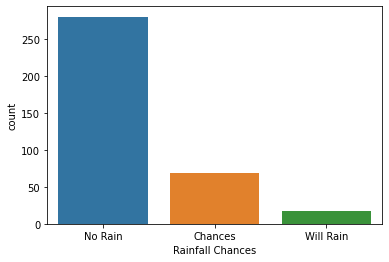

In [44]:
display = sns.countplot(new_ds['Rainfall Chances'])
display